##1. Library

In [149]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import OrdinalEncoder, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor

from xgboost import XGBRegressor
from sklearn.metrics import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/job_analysis/cdata_for_sp.csv', index_col= 0)

##data dimensions

In [65]:
data.columns

Index(['CompanyName', 'CompanyRating', 'JobTitle', 'Salary', 'OfficeLocation',
       'JobDescription', 'JobLink', 'YearFounded', 'CompanySize',
       'CompanyIndustry', 'CompanyType', 'CompanySector', 'CompanyRevenue',
       'JobType', 'MinSalary', 'MaxSalary', 'AvgSalary', 'OfficeCity',
       'OfficeState', 'CompanyAge', 'Python', 'Rstudio', 'DataVisualization',
       'Tableau', 'PowerBI', 'Spark', 'aws', 'Azure', 'JobSeniority'],
      dtype='object')

In [66]:
print(f'There are {data.shape[0]} data points and {data.shape[1]} features in the dataset')

There are 1197 data points and 29 features in the dataset


In [67]:
data.dtypes

CompanyName           object
CompanyRating        float64
JobTitle              object
Salary                object
OfficeLocation        object
JobDescription        object
JobLink               object
YearFounded          float64
CompanySize           object
CompanyIndustry       object
CompanyType           object
CompanySector         object
CompanyRevenue        object
JobType               object
MinSalary            float64
MaxSalary            float64
AvgSalary            float64
OfficeCity            object
OfficeState           object
CompanyAge           float64
Python                 int64
Rstudio                int64
DataVisualization      int64
Tableau                int64
PowerBI                int64
Spark                  int64
aws                    int64
Azure                  int64
JobSeniority          object
dtype: object

##Summary Statistics

In [68]:
data.describe(include=np.number)

,CompanyRating,YearFounded,MinSalary,MaxSalary,AvgSalary,CompanyAge,Python,Rstudio,DataVisualization,Tableau,PowerBI,Spark,aws,Azure
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.00000,1197.000000,1197.000000,1197.000000,1197.000000
mean,3.895231,1954.209691,45.322490,64.430911,54.876700,68.790309,0.367586,0.001671,0.135338,0.19716,0.091061,0.088555,0.138680,0.063492
std,0.413468,63.709260,14.140573,22.046285,17.510943,63.709260,0.482349,0.040859,0.342228,0.39802,0.287816,0.284219,0.345757,0.243948
min,1.500000,1625.000000,2.780000,3.330000,3.330000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.700000,1923.000000,36.670000,51.110000,43.890000,23.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.900000,1978.000000,43.890000,61.110000,52.500000,45.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,4.200000,2000.000000,50.000000,73.650000,62.500000,100.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2021.000000,133.330000,194.440000,163.885000,398.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [69]:
data.describe(include='object')

,CompanyName,JobTitle,Salary,OfficeLocation,JobDescription,JobLink,CompanySize,CompanyIndustry,CompanyType,CompanySector,CompanyRevenue,JobType,OfficeCity,OfficeState,JobSeniority
count,1197,1197,1061,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197,1197
unique,657,855,799,130,1112,1197,7,74,9,25,9,3,130,7,2
top,Deloitte,Data Scientist,130k,"Atlanta, GA","\nGather requirements, document user stories, ...",https://www.glassdoor.com/partner/jobListing.h...,10000+ Employees,Health Care Services & Hospitals,Company - Public,Information Technology,$10+ billion (USD),data scientist,Atlanta,WA,junior
freq,34,66,6,188,6,1,576,96,492,222,406,481,188,220,866


In [70]:
##correlation
sns.set(rc={'figure.figsize':(11.7,8.27)})

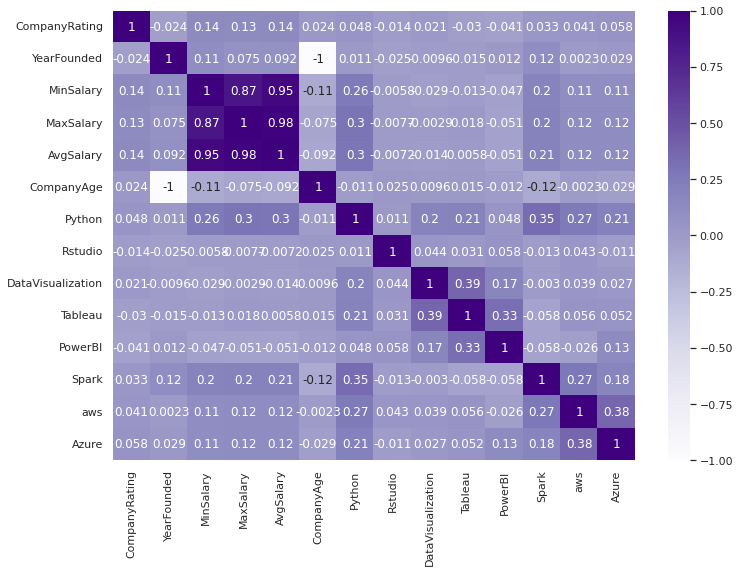

In [71]:
sns.heatmap(data.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)

In [72]:
##Data Distribution
###Data Distribution of Features 
data.dtypes

CompanyName           object
CompanyRating        float64
JobTitle              object
Salary                object
OfficeLocation        object
JobDescription        object
JobLink               object
YearFounded          float64
CompanySize           object
CompanyIndustry       object
CompanyType           object
CompanySector         object
CompanyRevenue        object
JobType               object
MinSalary            float64
MaxSalary            float64
AvgSalary            float64
OfficeCity            object
OfficeState           object
CompanyAge           float64
Python                 int64
Rstudio                int64
DataVisualization      int64
Tableau                int64
PowerBI                int64
Spark                  int64
aws                    int64
Azure                  int64
JobSeniority          object
dtype: object

##Vis

In [73]:
data_num=data[['CompanyRating','CompanyAge']]
data_num.skew()

CompanyRating   -0.801987
CompanyAge       1.702459
dtype: float64

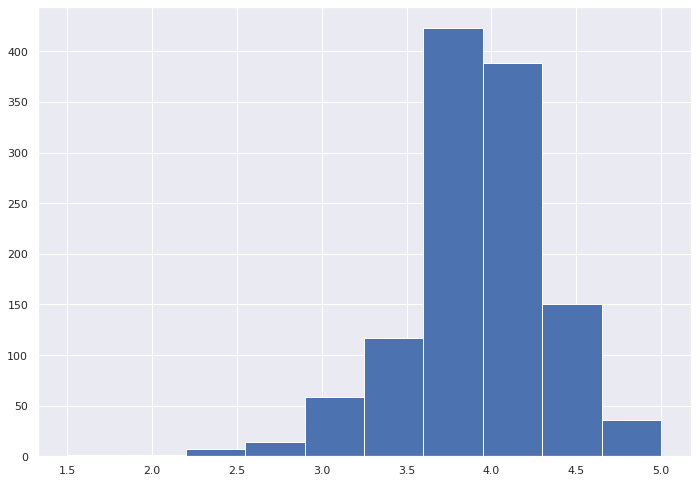

In [74]:
data.CompanyRating.hist()

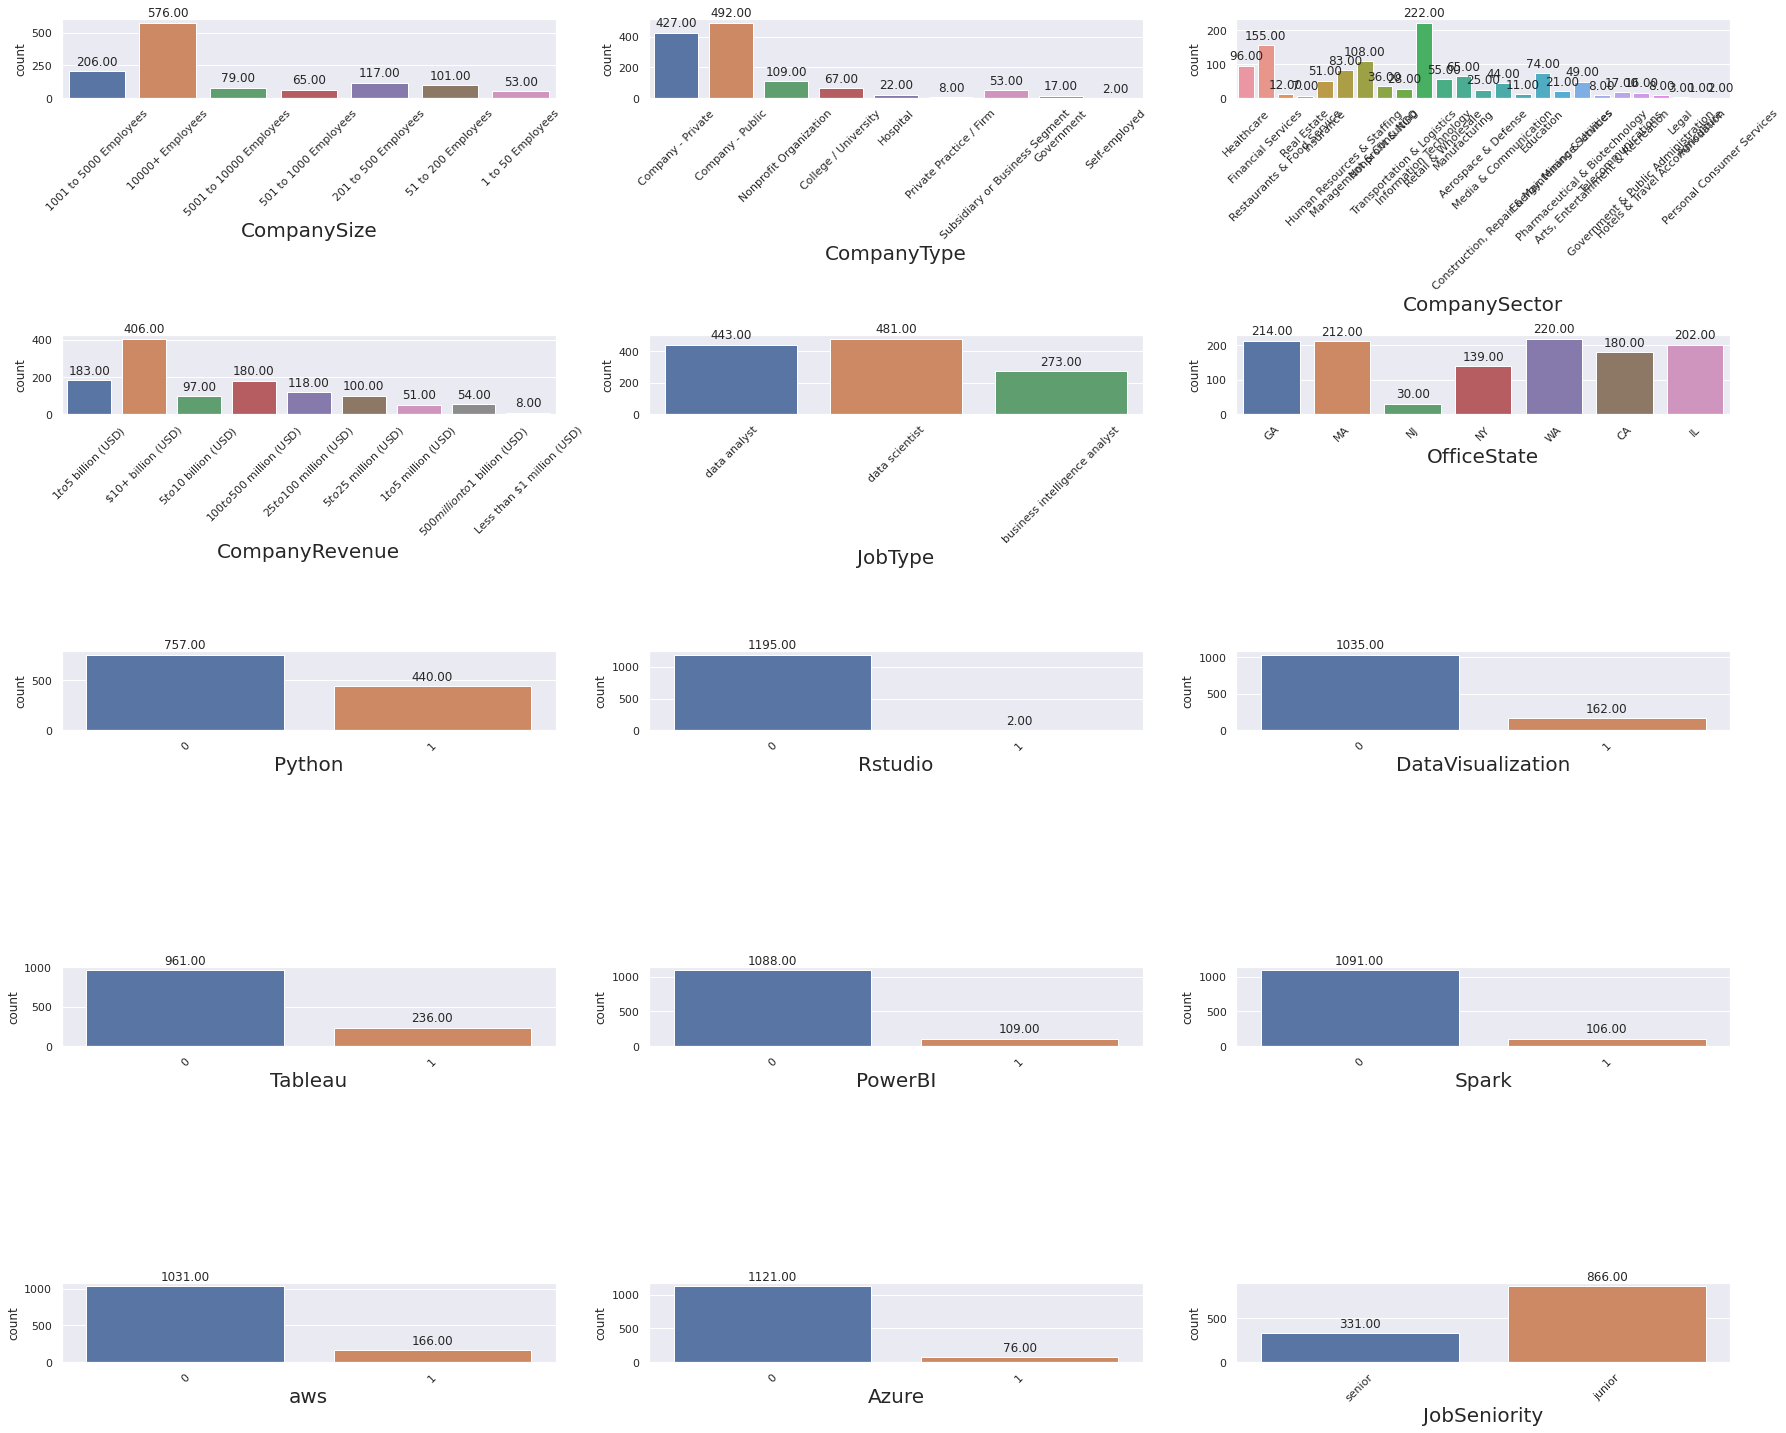

In [75]:
data_cat = data[['CompanySize','CompanyType','CompanySector','CompanyRevenue','JobType','OfficeState','Python', 'Rstudio', 'DataVisualization',
       'Tableau', 'PowerBI', 'Spark', 'aws', 'Azure', 'JobSeniority']]
fig,ax= plt.subplots(nrows=5,ncols=3,figsize=(25, 20)) 
for variable, subplot in zip(data_cat.columns,ax.flatten()):
    z = sns.countplot(x = data_cat[variable],ax=subplot, ) 
    z.set_xlabel(variable, fontsize = 20)
    z.set_xticklabels(z.get_xticklabels(),rotation=45)
    for p in z.patches:
      z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')
    
plt.tight_layout()

In [76]:
#### data distribution of target

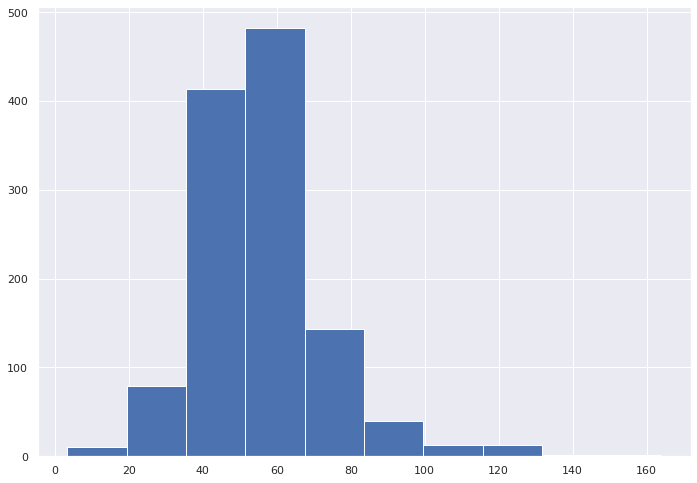

In [77]:
data.AvgSalary.hist()

## Model

In [4]:
#data preprocessing
data_cat_ord_enc = data[['CompanySize','CompanyRevenue','JobSeniority','JobSimp']]

data_cat_one_hot = data[['CompanyType','CompanySector','OfficeState']]

data_num = data[['AvgSalary','CompanyRating','CompanyAge']]

data_onehot = data[['Python', 'Rstudio', 'DataVisualization','Tableau', 'PowerBI', 'Spark', 'aws', 'Azure']]

In [5]:
#OrdinalEncoding
data_cat_ord_enc['CompanySize'] = data_cat_ord_enc['CompanySize'].map(lambda x: x.strip())
data_cat_ord_enc['CompanyRevenue'] = data_cat_ord_enc['CompanyRevenue'].map(lambda x: x.strip())

companysize_encoder = OrdinalEncoder(categories = [["1 to 50 Employees", "51 to 200 Employees", "201 to 500 Employees", "501 to 1000 Employees","1001 to 5000 Employees","5001 to 10000 Employees",'10000+ Employees']])
data_cat_ord_enc['CompanySize'] = companysize_encoder.fit_transform(data_cat_ord_enc['CompanySize'].values.reshape(-1,1))

companyrevenue_encoder = OrdinalEncoder(categories = [["Less than $1 million (USD)", "$1 to $5 million (USD)", "$5 to $25 million (USD)", "$25 to $100 million (USD)","$100 to $500 million (USD)","$500 million to $1 billion (USD)",'$1 to $5 billion (USD)','$5 to $10 billion (USD)','$10+ billion (USD)']])
data_cat_ord_enc['CompanyRevenue'] = companyrevenue_encoder.fit_transform(data_cat_ord_enc['CompanyRevenue'].values.reshape(-1,1))


jobseniority_encoder = OrdinalEncoder(categories = [['junior','senior']])
data_cat_ord_enc['JobSeniority'] = jobseniority_encoder.fit_transform(data_cat_ord_enc['JobSeniority'].values.reshape(-1,1))


jobsimp_encoder = OrdinalEncoder(categories = [['data analyst','business analyst','data engineer','manager','data scientist','mle','director']])
data_cat_ord_enc['JobSimp'] = jobsimp_encoder.fit_transform(data_cat_ord_enc['JobSimp'].values.reshape(-1,1))

<ipython-input-5-bc03ec0382a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat_ord_enc['CompanySize'] = data_cat_ord_enc['CompanySize'].map(lambda x: x.strip())
<ipython-input-5-bc03ec0382a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat_ord_enc['CompanyRevenue'] = data_cat_ord_enc['CompanyRevenue'].map(lambda x: x.strip())
<ipython-input-5-bc03ec0382a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [6]:
data_cat_one_hot.CompanySector.value_counts()

Information Technology                         222
Financial Services                             155
Management & Consulting                        108
Healthcare                                      96
Human Resources & Staffing                      83
Education                                       74
Manufacturing                                   65
Retail & Wholesale                              55
Insurance                                       51
Pharmaceutical & Biotechnology                  49
Media & Communication                           44
Nonprofit & NGO                                 36
Transportation & Logistics                      28
Aerospace & Defense                             25
Energy, Mining & Utilities                      21
Telecommunications                              17
Government & Public Administration              16
Restaurants & Food Service                      12
Construction, Repair & Maintenance Services     11
Arts, Entertainment & Recreatio

In [7]:
#binning company sectors
#data_cat_one_hot['CompanySector'] = data_cat_one_hot['CompanySector'].map(company_sector_map)
def company_sector_map(sector):

    if sector == 'Pharmaceutical & Biotechnology':
        return 'Healthcare'
    elif sector in ['Transportation & Logistics','Aerospace & Defense','Energy, Mining & Utilities',
                    'Telecommunications','Government & Public Administration','Restaurants & Food Service','Construction, Repair & Maintenance Services',
                    'Arts, Entertainment & Recreation','Hotels & Travel Accommodation','Real Estate','Legal','Personal Consumer Services','Agriculture']:
        return 'Others'
    else:
        return str(sector)

In [8]:
data_cat_one_hot['CompanySector'] = data_cat_one_hot['CompanySector'].apply(company_sector_map)

<ipython-input-8-cfec5bf49348>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat_one_hot['CompanySector'] = data_cat_one_hot['CompanySector'].apply(company_sector_map)


In [9]:
def company_type_map(companytype):

    if companytype in ['College / University','Subsidiary or Business Segment','Hospital','Government','Private Practice / Firm','Self-employed']:
        return 'Others'
    else:
        return str(companytype)

In [10]:
data_cat_one_hot['CompanyType'] = data_cat_one_hot['CompanyType'].apply(company_type_map)

<ipython-input-10-9c24de13be93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat_one_hot['CompanyType'] = data_cat_one_hot['CompanyType'].apply(company_type_map)


In [89]:
#one hot encoding
data_dum = pd.get_dummies(data_cat_one_hot, drop_first= True)

data_final = pd.concat([data_num,data_onehot,data_cat_ord_enc,data_dum], axis = 1)

In [90]:
data_final.shape

(1197, 35)

In [91]:
#deal w numeric data

In [92]:
q3_AvgSalary, q1_AvgSalary = np.percentile(data_final['AvgSalary'], [75, 25])

q3_CompanyRating, q1_CompanyRating = np.percentile(data_final['CompanyRating'], [75, 25])

q3_CompanyAge, q1_CompanyAge = np.percentile(data_final['CompanyAge'], [75, 25])

In [93]:
data_final['AvgSalary'] = data_final['AvgSalary'].map(lambda x: x if x > q1_AvgSalary - 1.5 * (q3_AvgSalary - q1_AvgSalary) and x < q3_AvgSalary + 1.5 * (q3_AvgSalary - q1_AvgSalary) else None)

In [94]:
data_final['AvgSalary'].isnull().sum()

51

In [95]:
data_final['CompanyRating'] = data_final['CompanyRating'].map(lambda x: x if x > q1_CompanyRating - 1.5 * (q3_CompanyRating - q1_CompanyRating) and x < q3_CompanyRating + 1.5 * (q3_CompanyRating - q1_CompanyRating) else None)

In [96]:
data_final['CompanyAge'] = data_final['CompanyAge'].map(lambda x: x if x > q1_CompanyAge - 1.5 * (q3_CompanyAge - q1_CompanyAge) and x < q3_CompanyAge + 1.5 * (q3_CompanyAge - q1_CompanyAge) else None)

In [97]:
data_final.dropna(axis = 0, inplace = True)
data_final.reset_index(drop=True)

,AvgSalary,CompanyRating,CompanyAge,Python,Rstudio,DataVisualization,Tableau,PowerBI,Spark,aws,...,CompanySector_Media & Communication,CompanySector_Nonprofit & NGO,CompanySector_Others,CompanySector_Retail & Wholesale,OfficeState_GA,OfficeState_IL,OfficeState_MA,OfficeState_NJ,OfficeState_NY,OfficeState_WA
0,51.665,4.0,29.0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,49.165,4.0,168.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,53.610,3.7,19.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,43.055,3.9,77.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,40.555,3.2,13.0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,43.055,4.1,194.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1080,43.335,3.9,16.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1081,51.945,4.7,10.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1082,48.890,3.5,42.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
data_final

,AvgSalary,CompanyRating,CompanyAge,Python,Rstudio,DataVisualization,Tableau,PowerBI,Spark,aws,...,CompanySector_Media & Communication,CompanySector_Nonprofit & NGO,CompanySector_Others,CompanySector_Retail & Wholesale,OfficeState_GA,OfficeState_IL,OfficeState_MA,OfficeState_NJ,OfficeState_NY,OfficeState_WA
0,51.665,4.0,29.0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,49.165,4.0,168.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,53.610,3.7,19.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,43.055,3.9,77.0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,40.555,3.2,13.0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,43.055,4.1,194.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1193,43.335,3.9,16.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1194,51.945,4.7,10.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1195,48.890,3.5,42.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#feature scaling
col = data_final[['AvgSalary','CompanyRating','CompanyAge']]
data_final.drop(col, axis = 1, inplace = True)

standard_scale = StandardScaler()
col1 = standard_scale.fit_transform(col)
data_scaled = pd.DataFrame(col1, columns = col.columns)

data_scaled.head()

In [99]:
#feature scaling
col = data_final[['AvgSalary','CompanyRating','CompanyAge']] 
data_final.drop(col, axis = 1, inplace = True)

standard_scale = StandardScaler() 
col1 = standard_scale.fit_transform(col)
data_scaled = pd.DataFrame(col1, columns = col.columns)

data_scaled.head()

,AvgSalary,CompanyRating,CompanyAge
0,-0.133625,0.222405,-0.654800
1,-0.323336,0.222405,1.963566
2,0.013970,-0.616563,-0.843172
3,-0.786991,-0.057251,0.249384
4,-0.976702,-2.014843,-0.956195


In [103]:
data_final.reset_index(drop=True,inplace = True)

In [104]:
data_final

,Python,Rstudio,DataVisualization,Tableau,PowerBI,Spark,aws,Azure,CompanySize,CompanyRevenue,...,CompanySector_Media & Communication,CompanySector_Nonprofit & NGO,CompanySector_Others,CompanySector_Retail & Wholesale,OfficeState_GA,OfficeState_IL,OfficeState_MA,OfficeState_NJ,OfficeState_NY,OfficeState_WA
0,0,0,0,1,1,0,0,0,4.0,6.0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,6.0,8.0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,6.0,8.0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,5.0,7.0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,3.0,4.0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,0,0,0,0,0,0,0,0,3.0,3.0,...,0,0,0,0,0,0,1,0,0,0
1080,0,0,0,0,0,0,0,0,6.0,7.0,...,0,0,0,0,0,0,1,0,0,0
1081,0,0,0,0,1,0,0,0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
1082,0,0,0,0,0,0,0,0,3.0,2.0,...,0,0,0,0,0,0,1,0,0,0


In [105]:
#combine the dataframes into 1

df_final = pd.concat([data_scaled, data_final], axis=1)

In [133]:
#df_final.to_csv('/content/drive/MyDrive/job_analysis/abc.csv',index=False)

In [107]:
#drop corelated features

In [108]:
cor_matrix = df_final.drop(['AvgSalary'] ,axis = 1).corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

<ipython-input-108-7538f9578b45>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [109]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.4)]
to_drop

['Tableau',
 'CompanySize',
 'CompanyRevenue',
 'JobSimp',
 'CompanyType_Company - Public',
 'CompanySector_Nonprofit & NGO']

In [110]:
sns.set(rc={'figure.figsize':(20,18)})

In [111]:
#Feature Selection using Random Forest
Features = df_final.drop(['AvgSalary'] ,axis = 1)
Target = df_final['AvgSalary']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.20, random_state=7)

model =  RandomForestRegressor(random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

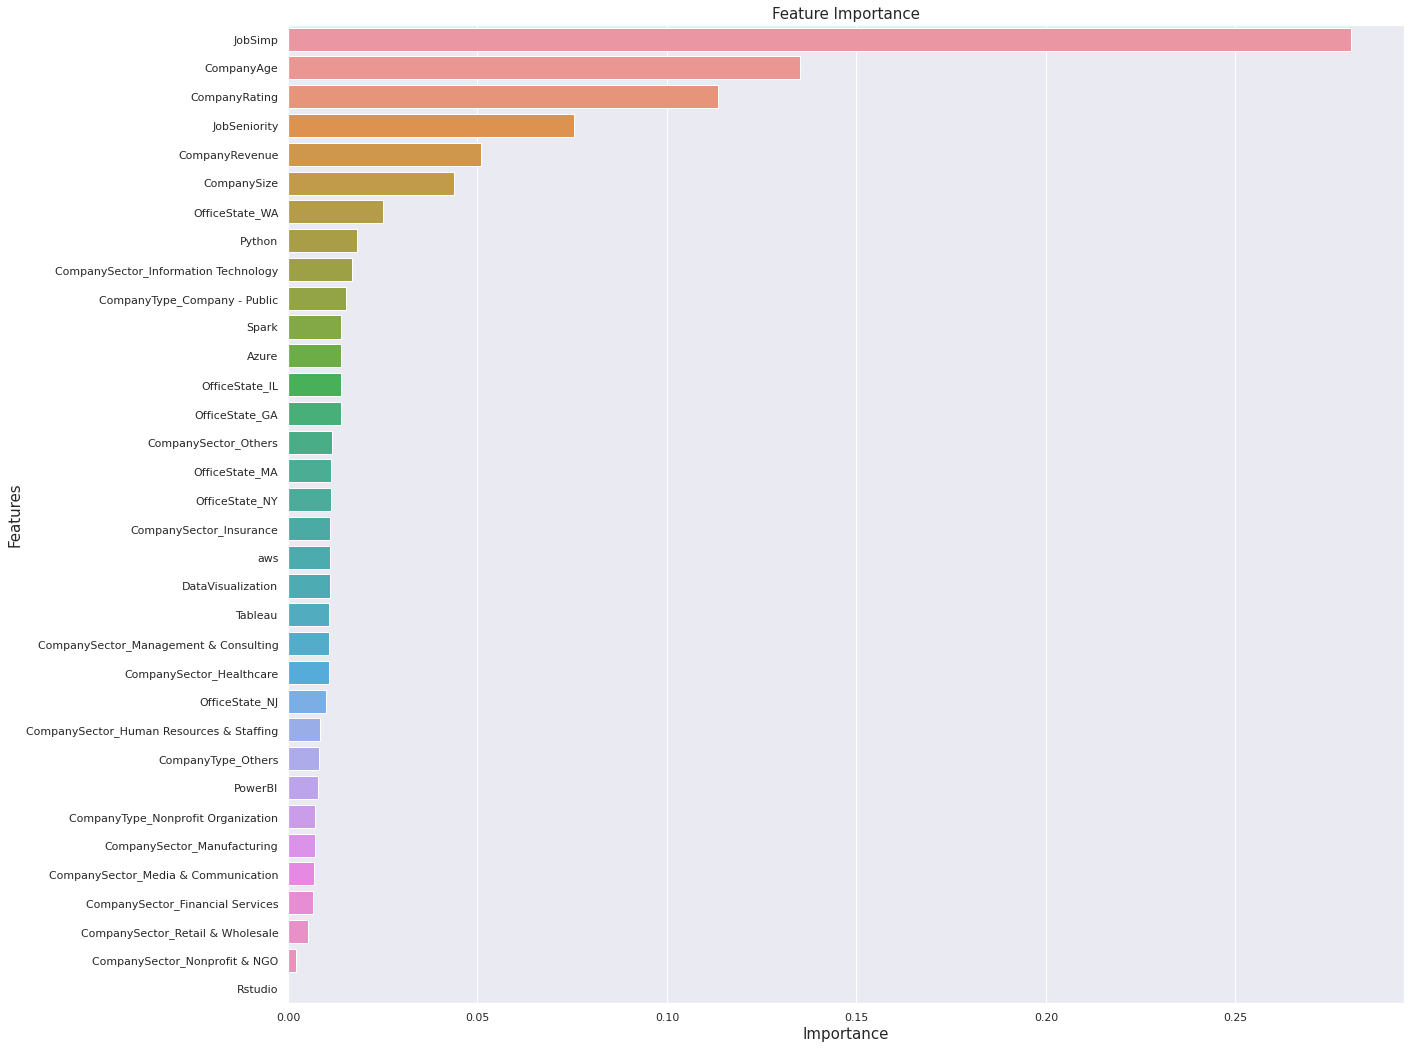

In [113]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [114]:
#Important features are identified using Random Forest and dropping inconsistent features.
X = Features.drop(['Rstudio',
                   'CompanySector_Nonprofit & NGO',
                   'CompanyType_Nonprofit Organization',
                   'CompanySector_Manufacturing',
                   'CompanySector_Retail & Wholesale'], axis =1)
y = Target

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 7)

In [116]:
# Grid Search CV
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='neg_mean_absolute_error',
                         cv = 5,
                         n_jobs = -1)
    gscv.fit(X_train , y_train)
    result = gscv.best_params_
    return result

In [117]:
start_time = time.time()
sgd_gs = SGDRegressor()
sgd_params = {
    'penalty' : ['l1','l2'],
    'learning_rate' : ['constant','adaptive','invscaling'],
    'max_iter':[1500,2500],
    'eta0' : [0.01,0.001,0.0001]
    }
r2 = gridsearch(sgd_gs , sgd_params)
print(f'Best parameters for Stochastic Gradient Descent :{r2}')
print("--- %s seconds ---" % (time.time() - start_time))

Best parameters for Stochastic Gradient Descent :{'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 2500, 'penalty': 'l1'}
--- 3.2644293308258057 seconds ---


In [118]:
start_time = time.time()
svm_gs = SVR()
svm_params ={'kernel':['linear','poly','rbf']}
r3 = gridsearch(svm_gs , svm_params)
print(f'Best parameters for SVM: {r3}')
print("--- %s seconds ---" % (time.time() - start_time))

Best parameters for SVM: {'kernel': 'rbf'}
--- 1.143580436706543 seconds ---


In [119]:
start_time = time.time()
rf_gs = RandomForestRegressor(random_state = 0)
rf_params = {
  'n_estimators':[300,400,500,600,700,800],
 'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'bootstrap' : [True, False],
 'max_features': ("sqrt", "log2") }
r4 = gridsearch(rf_gs , rf_params)
print(f'Best parameters for Random Forest :{r4}')
print("--- %s seconds ---" % (time.time() - start_time))

Best parameters for Random Forest :{'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
--- 737.561586856842 seconds ---


In [120]:
start_time = time.time()
ab_gs = AdaBoostRegressor(random_state = 0)
ab_params ={
            'n_estimators':[200,300,400,500,600],
             'learning_rate':[0.001,0.005,0.01]
            }
r5 = gridsearch(ab_gs , ab_params)
print(f'Best parameters for AdaBoost :{r5}')
print("--- %s seconds ---" % (time.time() - start_time))

Best parameters for AdaBoost :{'learning_rate': 0.001, 'n_estimators': 200}
--- 55.31142330169678 seconds ---


In [121]:
start_time = time.time()
xgb_gs =  XGBRegressor(random_state = 0, verbosity = 0)
xgb_params =  {'n_estimators':[200,300,400,500,600],
              'learning_rate':np.arange(0.01,0.11,0.01)} 
r6 = gridsearch(xgb_gs , xgb_params)
print(f'Best parameters for XGBoost :{r6}')
print("--- %s seconds ---" % (time.time() - start_time))

Best parameters for XGBoost :{'learning_rate': 0.04, 'n_estimators': 300}
--- 54.019500732421875 seconds ---


In [122]:
# Kfold Cross Validation
def kfcv(model , x , y):
    r_square = cross_val_score(estimator = model, X = x, y = y, cv = 10, n_jobs = -1,scoring='neg_mean_absolute_error')
    return r_square

In [123]:
lr_rg = LinearRegression()
sgd_rg = SGDRegressor(eta0 = 0.01, learning_rate= 'adaptive', max_iter= 2500, penalty= 'l1')
svm_rg = SVR(kernel = 'rbf')
rf_rg  = RandomForestRegressor(random_state=0 ,max_features='sqrt' , min_samples_split= 5, min_samples_leaf = 2 , n_estimators= 300, bootstrap='False')
ab_rg  = AdaBoostRegressor(n_estimators=200, learning_rate = 0.001, random_state=0)
xgb_rg = XGBRegressor(random_state= 0 , learning_rate= 0.04 , n_estimators= 300)

In [124]:
#### Accuracies for all base models
r_square = kfcv(lr_rg , X_train , y_train)
print(f'Linear Regression: \n Mean R square {r_square.mean()} \n Minimum R square {r_square.min()} \n Maximum R square {r_square.max()} \n R square: {r_square}')

Linear Regression: 
 Mean R square -0.6210412769092667 
 Minimum R square -0.6900663135543973 
 Maximum R square -0.5405864510680187 
 R square: [-0.69006631 -0.54058645 -0.60847923 -0.62217414 -0.60332726 -0.54632745
 -0.61418056 -0.67277476 -0.65196951 -0.66052709]


In [125]:
r_square2 = kfcv(sgd_rg ,X_train , y_train)
print(f'SGD Regression: \n Mean R square {r_square2.mean()} \n Minimum R square {r_square2.min()} \n Maximum R square {r_square2.max()} \n R square: {r_square2}')

SGD Regression: 
 Mean R square -0.6220999429711652 
 Minimum R square -0.6918097197153481 
 Maximum R square -0.5420813700620062 
 R square: [-0.69180972 -0.54208137 -0.60771409 -0.62305307 -0.60326148 -0.54506099
 -0.62063933 -0.6734665  -0.65429176 -0.65962113]


In [126]:
r_square3 = kfcv(svm_rg ,X_train , y_train)
print(f'SVM Regression: \n Mean R square {r_square3.mean()} \n Minimum R square {r_square3.min()} \n Maximum R square {r_square3.max()} \n R square: {r_square3}')

SVM Regression: 
 Mean R square -0.5986383946065106 
 Minimum R square -0.6940182075376149 
 Maximum R square -0.5017367907637872 
 R square: [-0.66121296 -0.51079778 -0.56835668 -0.59742867 -0.57417298 -0.50173679
 -0.57546689 -0.64405341 -0.69401821 -0.65913958]


In [127]:
r_square4 = kfcv(rf_rg ,X_train , y_train)
print(f'Random Forest Regression: \n Mean R square {r_square4.mean()} \n Minimum R square {r_square4.min()} \n Maximum R square {r_square4.max()} \n R square: {r_square4}')

Random Forest Regression: 
 Mean R square -0.5988780746332426 
 Minimum R square -0.6594187184813783 
 Maximum R square -0.49533874778018083 
 R square: [-0.64289948 -0.50173035 -0.60385369 -0.60586628 -0.60511515 -0.49533875
 -0.58848274 -0.64720191 -0.65941872 -0.63887368]


In [128]:
r_square5 = kfcv(ab_rg ,X_train , y_train)
print(f'AdaBoost Regression: \n Mean R square {r_square5.mean()} \n Minimum R square {r_square5.min()} \n Maximum R square {r_square5.max()} \n R square: {r_square5}')

AdaBoost Regression: 
 Mean R square -0.6344655638579421 
 Minimum R square -0.714470885865848 
 Maximum R square -0.5197341585138616 
 R square: [-0.71447089 -0.54854043 -0.63139927 -0.64135191 -0.63523701 -0.51973416
 -0.61604694 -0.69015698 -0.6812257  -0.66649234]


In [129]:
r_square6 = kfcv(xgb_rg ,X_train , y_train)
print(f'XGBoost Regression: \n Mean R square {r_square6.mean()} \n Minimum R square {r_square6.min()} \n Maximum R square {r_square6.max()} \n R square: {r_square6}')

XGBoost Regression: 
 Mean R square -0.598926344605524 
 Minimum R square -0.669051558383046 
 Maximum R square -0.5174038411989128 
 R square: [-0.66050194 -0.51740384 -0.56929984 -0.58781892 -0.56459787 -0.54756826
 -0.55849664 -0.65375052 -0.66905156 -0.66077406]


In [ ]:
### Model Building

In [141]:
#lr
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [134]:
#sgd
sgd = SGDRegressor(eta0 = 0.01, learning_rate= 'adaptive', max_iter= 2500, penalty= 'l1')
sgd.fit(X_train, y_train)

SGDRegressor(learning_rate='adaptive', max_iter=2500, penalty='l1')

In [135]:
#svm
svm = svm_rg = SVR(kernel = 'rbf')
svm.fit(X_train, y_train)

SVR()

In [ ]:
### Random Forest

In [136]:
rf = RandomForestRegressor(random_state=0 ,max_features='sqrt' , min_samples_split= 5, min_samples_leaf = 2 , n_estimators= 300, bootstrap='False')
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap='False', max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5, n_estimators=300,
                      random_state=0)

In [137]:
##ada boost
ab = AdaBoostRegressor(n_estimators=200, learning_rate = 0.001, random_state=0)
ab.fit(X_train , y_train)

AdaBoostRegressor(learning_rate=0.001, n_estimators=200, random_state=0)

In [138]:
#XGBoost
xgb = XGBRegressor(random_state= 0 , learning_rate= 0.04 , n_estimators= 300, verbosity = 0)
xgb.fit(X_train , y_train)

XGBRegressor(learning_rate=0.04, n_estimators=300, verbosity=0)

In [ ]:
# Model Performance

In [142]:
y_pred1tr = lr.predict(X_train)
y_pred2tr = sgd.predict(X_train)
y_pred3tr = svm.predict(X_train)
y_pred4tr = rf.predict(X_train)
y_pred5tr = ab.predict(X_train)
y_pred6tr = xgb.predict(X_train)

In [143]:
y_pred1 = lr.predict(X_test)
y_pred2 = sgd.predict(X_test)
y_pred3 = svm.predict(X_test)
y_pred4 = rf.predict(X_test)
y_pred5 = ab.predict(X_test)
y_pred6 = xgb.predict(X_test)

In [194]:
# Comparison of Different Models wrt Performance Metrics
comp = pd.DataFrame({'Model':['Linear Regression','Stochastic gradient descent','Support vector machine','Random Forest'],
                    'Train MAE':[mean_absolute_error(y_train,y_pred1tr), mean_absolute_error(y_train,y_pred2tr), mean_absolute_error(y_train,y_pred3tr), mean_absolute_error(y_train,y_pred4tr)],
                    'Test MAE':[mean_absolute_error(y_test,y_pred1), mean_absolute_error(y_test,y_pred2), mean_absolute_error(y_test,y_pred3), mean_absolute_error(y_test,y_pred4)],
                    'Test R square':[r2_score(y_test,y_pred1), r2_score(y_test,y_pred2), r2_score(y_test,y_pred3), r2_score(y_test,y_pred4)]}
                    )

print(comp)

                         Model  Train MAE  Test MAE  Test R square
0            Linear Regression   0.597231  0.618250       0.459046
1  Stochastic gradient descent   0.597767  0.617602       0.460808
2       Support vector machine   0.554843  0.605505       0.454464
3                Random Forest   0.413236  0.598457       0.481758


In [195]:
## Model Ensembling

In [196]:
# voting classifier
rgr1 = SGDRegressor(eta0 = 0.01, learning_rate= 'adaptive', max_iter= 2500, penalty= 'l1')
rgr2 = RandomForestRegressor(random_state=0 ,max_features='sqrt' , min_samples_split= 5, min_samples_leaf = 2 , n_estimators= 300, bootstrap='False')
rgr3 = AdaBoostRegressor(n_estimators=250, learning_rate = 0.01,random_state=0)
vrgr = VotingRegressor(estimators=[('Stochastic Gradient Descent', rgr1), ('Random_Forest', rgr2), ('AdaBoost' , rgr3)],weights=[0.1,0.8,0.1])

In [197]:
# stacking classifier
estimators = [('Voting Regressor' , vrgr),('XGBoost', XGBRegressor(random_state= 0 , learning_rate= 0.04 , n_estimators= 300, verbosity = 0))]

stackrgr = StackingRegressor(estimators=estimators, final_estimator = LinearRegression())

In [198]:
stackrgr.fit(X_train ,y_train)

StackingRegressor(estimators=[('Voting Regressor',
                               VotingRegressor(estimators=[('Stochastic '
                                                            'Gradient Descent',
                                                            SGDRegressor(learning_rate='adaptive',
                                                                         max_iter=2500,
                                                                         penalty='l1')),
                                                           ('Random_Forest',
                                                            RandomForestRegressor(bootstrap='False',
                                                                                  max_features='sqrt',
                                                                                  min_samples_leaf=2,
                                                                                  min_samples_split=5,
                                 

In [199]:
y_pred7tr = stackrgr.predict(X_train)
y_pred7 = stackrgr.predict(X_test)

In [200]:
comp1 = pd.DataFrame({'Model':['Final Model'],
                      'Train MAE':[mean_absolute_error(y_train,y_pred7tr)],
                      'Test MAE':[mean_absolute_error(y_test,y_pred7)],
                      'Test R square':[r2_score(y_test , y_pred6)]}
                      )
final_comp = pd.concat([comp, comp1], axis = 0)

In [201]:
final_comp.reset_index(drop=True, inplace=True)

print(final_comp)

                         Model  Train MAE  Test MAE  Test R square
0            Linear Regression   0.597231  0.618250       0.459046
1  Stochastic gradient descent   0.597767  0.617602       0.460808
2       Support vector machine   0.554843  0.605505       0.454464
3                Random Forest   0.413236  0.598457       0.481758
4                  Final Model   0.429013  0.585088       0.505475
